In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py, glob
import pandas as pd

from scipy.stats import ks_2samp
from ang_res_funcs import *


In [2]:
PARENT_DIRECTORY = '/data/ana/CosmicRay/Anisotropy/IceTop/twelve_year/03_sim_study'
years = [2012, 2015, 2018]
DIRECTS = [f'{PARENT_DIRECTORY}/IT81-{year}' for year in years]
for year, DIRECT in zip(years, DIRECTS):
    mc_en_p_t3 = np.load(DIRECT +'/Proton-T3-MC-Energy.npy')
    mc_en_he_t3 = np.load(DIRECT +'/Helium-T3-MC-Energy.npy')
    mc_en_o_t3 = np.load(DIRECT +'/Oxygen-T3-MC-Energy.npy')
    mc_en_fe_t3 = np.load(DIRECT +'/Iron-T3-MC-Energy.npy')
        
    mc_en_p_t4 = np.load(DIRECT +'/Proton-T4-MC-Energy.npy')
    mc_en_he_t4 = np.load(DIRECT +'/Helium-T4-MC-Energy.npy')
    mc_en_o_t4 = np.load(DIRECT +'/Oxygen-T4-MC-Energy.npy')
    mc_en_fe_t4 = np.load(DIRECT +'/Iron-T4-MC-Energy.npy')
        
    mc_w_p_t3 = np.load(DIRECT +'/Proton-T3-MC-Weights.npy')
    mc_w_he_t3 = np.load(DIRECT +'/Helium-T3-MC-Weights.npy')
    mc_w_o_t3 = np.load(DIRECT +'/Oxygen-T3-MC-Weights.npy')
    mc_w_fe_t3 = np.load(DIRECT +'/Iron-T3-MC-Weights.npy')
        
    mc_w_p_t4 = np.load(DIRECT +'/Proton-T4-MC-Weights.npy')
    mc_w_he_t4 = np.load(DIRECT +'/Helium-T4-MC-Weights.npy')
    mc_w_o_t4 = np.load(DIRECT +'/Oxygen-T4-MC-Weights.npy')
    mc_w_fe_t4 = np.load(DIRECT +'/Iron-T4-MC-Weights.npy')
        
    mc_en_t3 = np.concatenate((mc_en_p_t3, mc_en_he_t3, mc_en_o_t3, mc_en_fe_t3), axis=None)
    mc_en_t4 = np.concatenate((mc_en_p_t4, mc_en_he_t4, mc_en_o_t4, mc_en_fe_t4), axis=None)

    mc_w_t3 = np.concatenate((mc_w_p_t3, mc_w_he_t3, mc_w_o_t3, mc_w_fe_t3), axis=None)
    mc_w_t4 = np.concatenate((mc_w_p_t4, mc_w_he_t4, mc_w_o_t4, mc_w_fe_t4), axis=None)

    np.save(f'/data/user/ahayes/mc_en_t3_{year}.npy', mc_en_t3)
    np.save(f'/data/user/ahayes/mc_en_t4_{year}.npy', mc_en_t4)
    np.save(f'/data/user/ahayes/mc_w_t3_{year}.npy', mc_w_t3)
    np.save(f'/data/user/ahayes/mc_w_t4_{year}.npy', mc_w_t4)

In [3]:
mc_en_t3_2012 = np.load(f'/data/user/ahayes/mc_en_t3_2012.npy')
print("done")
mc_en_t4_2012 = np.load(f'/data/user/ahayes/mc_en_t4_2012.npy')
print("done")
mc_en_t3_2015 = np.load(f'/data/user/ahayes/mc_en_t3_2015.npy')
print("done")
mc_en_t4_2015 = np.load(f'/data/user/ahayes/mc_en_t4_2015.npy')
print("done")
mc_en_t3_2018 = np.load(f'/data/user/ahayes/mc_en_t3_2018.npy')
print("done")
mc_en_t4_2018 = np.load(f'/data/user/ahayes/mc_en_t4_2018.npy')
print("done")

mc_en_all = [mc_en_t3_2012, mc_en_t4_2012, mc_en_t3_2015, mc_en_t4_2015, mc_en_t3_2018, mc_en_t4_2018]
median_en_list = []
std_list = []
for mc_en in mc_en_all:
    median = np.percentile(mc_en, 50)
    std = np.percentile(mc_en, 84) - np.percentile(mc_en, 16)
    median_en_list.append(median)
    std_list.append(std)
print(median_en_list)

done
done
done
done
done
done
[9043372.0, 35546716.0, 9593788.0, 38712592.0, 6068972.5, 16777194.0]


In [4]:
data = {
    'year': [2012, 2012, 2015, 2015, 2018, 2018],
    'tier': [3, 4, 3, 4, 3, 4],
    'energy': median_en_list}

df = pd.DataFrame(data)

In [5]:
# Group by year and tier, then calculate median and std
stats = df.groupby(['year', 'tier']).agg({'energy': ['median', 'std']}).reset_index()

# Flatten MultiIndex columns
stats.columns = ['year', 'tier', 'median_energy', 'std_energy']

print(stats)


   year  tier  median_energy  std_energy
0  2012     3      9043372.0         NaN
1  2012     4     35546716.0         NaN
2  2015     3      9593788.0         NaN
3  2015     4     38712592.0         NaN
4  2018     3      6068972.5         NaN
5  2018     4     16777194.0         NaN


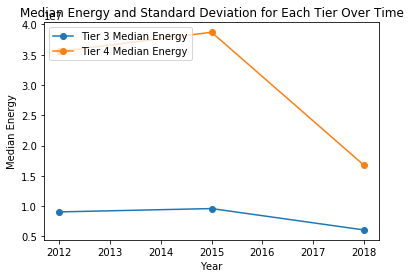

In [6]:
# Set up the plot
fig, ax1 = plt.subplots()

# Plot median energy
for tier in stats['tier'].unique():
    tier_data = stats[stats['tier'] == tier]
    ax1.plot(tier_data['year'], tier_data['median_energy'], marker='o', label=f'Tier {tier} Median Energy')

ax1.set_xlabel('Year')
ax1.set_ylabel('Median Energy')
ax1.legend(loc='upper left')

# Create a second y-axis for the standard deviation
# ax2 = ax1.twinx()

# Plot standard deviation
# for tier in stats['tier'].unique():
#     tier_data = stats[stats['tier'] == tier]
#     ax2.plot(tier_data['year'], tier_data['std_energy'], linestyle='--', marker='x', label=f'Tier {tier} Std Deviation')

# ax2.set_ylabel('Standard Deviation')
# ax2.legend(loc='upper right')

plt.title('Median Energy and Standard Deviation for Each Tier Over Time')
plt.show()
